In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate
from scipy.integrate import odeint
from labellines import labelLine, labelLines
plt.rcParams.update({'font.size': 18})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


D= 0.005191359785690274 DK= 0.0051924860384917745 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
512


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


D= 0.004247643700297302 DK= 0.004248397667856906 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
419
D= 0.004719511047381243 DK= 0.00472044185317434 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
465
D= 0.005191359785690274 DK= 0.0051924860384917745 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
512
D= 0.004247643700297302 DK= 0.004248397667856906 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
419
D= 0.004719511047381243 DK= 0.00472044185317434 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
465


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


D= 0.005191359785690274 DK= 0.0051924860384917745 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
512


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


D= 0.004247643700297302 DK= 0.004248397667856906 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
419
D= 0.004719511047381243 DK= 0.00472044185317434 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
465
D= 0.00519023402135241 DK= 0.0051924860384917745 k_het = 0.02903355649178067 T= 1223 P= 20000 CMTS0= 0.3278251496046461
()
(1000,)
(1000,)
(1000,)
256
D= 0.004246890000305027 DK= 0.004248397667856906 k_het = 0.02903355649178067 T= 1223 P= 20000 CMTS0= 0.3278251496046461
()
(1000,)
(1000,)
(1000,)
210
D= 0.004718580608599814 DK= 0.00472044185317434 k_het = 0.02903355649178067 T= 1223 P= 20000 CMTS0= 0.3278251496046461
()
(1000,)
(1000,)
(1000,)
233


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


D= 0.005191359785690274 DK= 0.0051924860384917745 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
512


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


D= 0.004247643700297302 DK= 0.004248397667856906 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
419
D= 0.004719511047381243 DK= 0.00472044185317434 k_het = 0.014516778245890335 T= 1223 P= 10000 CMTS0= 0.16391257480232305
()
(1000,)
(1000,)
(1000,)
465
D= 0.0055006430061763575 DK= 0.005501705983831925 k_het = 0.3110555260456865 T= 1373 P= 10000 CMTS0= 0.14600515585086754
()
(1000,)
(1000,)
(1000,)
24
D= 0.004500684199872038 DK= 0.004501395804953393 k_het = 0.3110555260456865 T= 1373 P= 10000 CMTS0= 0.14600515585086754
()
(1000,)
(1000,)
(1000,)
20
D= 0.005000672385031922 DK= 0.005001550894392659 k_het = 0.3110555260456865 T= 1373 P= 10000 CMTS0= 0.14600515585086754
()
(1000,)
(1000,)
(1000,)
22


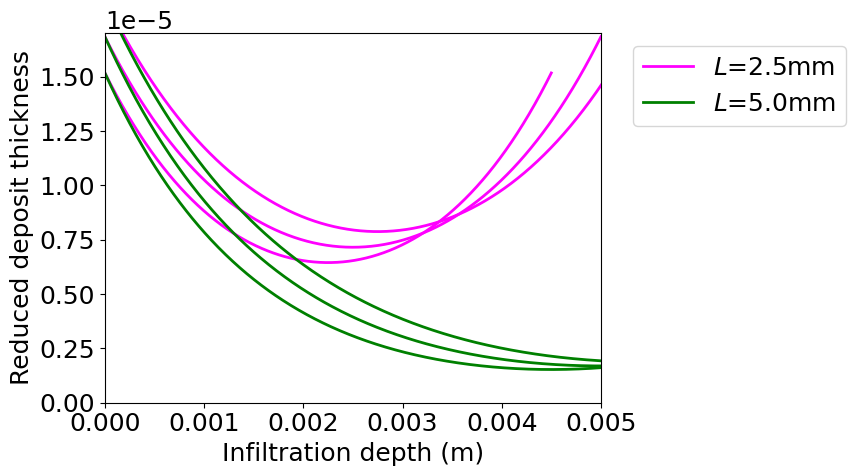

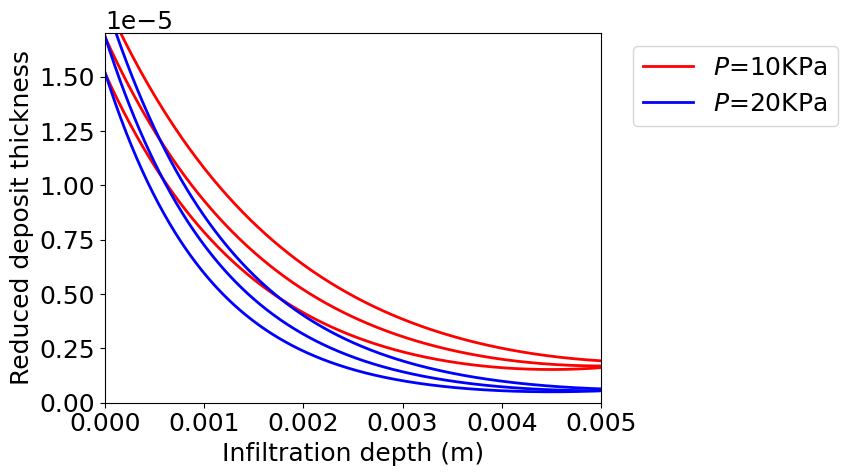

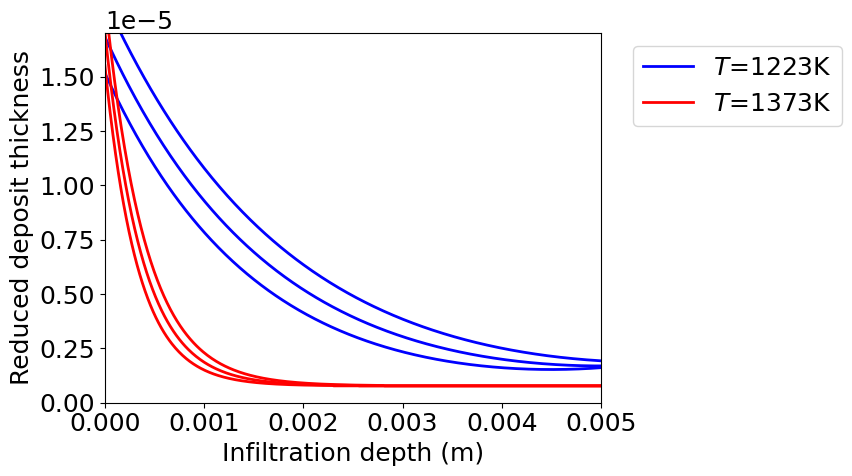

In [2]:
def cvi_sim(Tin,Pin, phi0in, rin, ain,clr,pllbl):
    plotlabel = str(pllbl)
    clr = str(clr)
    phi0 = phi0in
    L = rin*phi0
    rp0 = phi0/2
    nz = 1000
    dt = 0.1 #s
    Zrange = np.linspace(0,L,nz)
    alpha = ain
    P = Pin # Pa
    T = Tin # K
    R = 8.314 # J/mol K
    CMTS0 = (1/(1+alpha))*(P / (R*T)) 
    CH20 = (alpha/(1+alpha))*(P / (R*T)) 
    dCMTS0dz = dCH20dz = 0

    k0 = 389e9
    # k0 = 189e9
    Ea = 296e3
    k_het = k0*np.exp(-Ea/(R*T))*CMTS0
    # nu = k_het*CMTS0
    dKmts = 3.97 #m/sK^(1/2)
    dKh2 = 34.30 #m/sK^(1/2)
    dKhcl = 8.03 #m/sK^(1/2)
    DKmts=dKmts*phi0*(T**0.5) # m^2/s
    DKh2=dKh2*phi0*(T**0.5) # m^2/s
    DKhcl=dKhcl*phi0*(T**0.5) # m^2/s
    Msic = 0.04011 #kg/mol
    Mmts=0.149 #kg/mol
    Mh2 = 2e-3 #kg/mol
    Mhcl = 3.65e-2 #kg/mol
    rhosic = 3217 #kg/m^3
    # rhomts = 1270
    # rhoh2 = 0.08375
    # rhohcl = 1048
    Vsic=Msic/rhosic #m^3/mol
    Vmts=1.227e-4 #m^3/mol
    Vh2=1.43e-5 #m^3/mol
    Vhcl= 25.3e-5 #m^3/mol
    DFmtsh2=1.360e-3*((T**(3/2))/(P*(Vh2**(1/3)+Vmts**(1/3))**2))*(1/Mh2 + 1/Mmts)**0.5 #Gilliland formula Fedou1993 Appendix 1 Eq A4
    
    DK = DKmts
    DF = DFmtsh2
    D = (1/DF + 1/DK)**(-1)
    tau = math.sqrt((k_het*L**2)/(D*phi0))


    print('D=',D,'DK=',DK,'k_het =',k_het,'T=',T,'P=',P, 'CMTS0=',CMTS0)

    
    gauss_flag = 0 #0=uniform dist, 1=gaussian dist
    if gauss_flag == 0:
        rpi = rp0*np.ones(nz)
    else:
        rpi = rp0*np.ones(nz) + rp0*0.1*np.random.randn(nz)
    rp = rpi
    drpdzi = np.zeros(nz)
    drpdz = drpdzi

    # zi = z*nz/L
    # print(zi)

    Ct = []
    rpt = []


    n = 0
    # for i in range(2):



    while any(rp<rp0/100) is not True:

        C = CMTS0*(np.cosh((1-(2*Zrange)/L)*tau))/(np.cosh(tau))

        # if n == 1:
            # print(C.shape)
            # print(dCdz.shape)
        if n <4:
            print(k_het.shape)

        condition = C<(1/1000)*CMTS0
        if any(condition):
            C[condition.argmax():] = 0

        rp = rp - dt*2*Vsic*k_het
        # rp = rp - dt*2*Vsic*nu
        #rp = rp-dt*k_het*Vsic
        k_het = k0*np.exp(-Ea/(R*T))*C
        # nu = k_het *C
        
        drpdz[:-1] = (rp[1:] - rp[:-1])/nz
        drpdz[-1] = drpdz[-2]

        n+=1
        Ct.append(C)
        rpt.append(rp)
        if n % 1000 == 0:
            percent_closed = 100*(1 -(rp[0]-rp0/100)/rp0)
            print('n=',n,': at t =',round(n*dt*0.000277778,2),'hours, pore is', round(percent_closed,2),'% closed')

    rpl = len(rpt)
    print(n)
    if plotlabel == "none" or plotlabel == "":
        plt.plot(Zrange,rp0-rp,linewidth=2,color=clr)
    else:
        plt.plot(Zrange,rp0-rp,label=plotlabel,linewidth=2,color=clr)
    
    # print(rp0-rp)
    lines = str(rp0-rp)
    with open('cvi_'+'T'+str(T)+'_P'+str(P)+'_phi0'+str(phi0)+'_ar'+str(L/phi0)+'.txt', 'w') as f:
        f.writelines(lines)
    plt.xlabel(r'Infiltration depth (m)')
    plt.ylabel(r'Reduced deposit thickness')
    plt.xlim([0,L/2])
    plt.ylim([0,rp0])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.savefig('pore_T'+str(T)+'_P'+str(P)+'.png', dpi=220,bbox_inches='tight')
    
cvi_sim(1223,10000,34e-6*(11/10),294.117647059*(5/10),5,"magenta","")
cvi_sim(1223,10000,34e-6*(9/10),294.117647059*(5/10),5,"magenta","")
cvi_sim(1223,10000,34e-6,294.117647059*(5/10),5,"magenta",r"$L$=2.5mm")


cvi_sim(1223,10000,34e-6*(11/10),294.117647059,5,"green","")
cvi_sim(1223,10000,34e-6*(9/10),294.117647059,5,"green","")
cvi_sim(1223,10000,34e-6,294.117647059,5,"green",r"$L$=5.0mm")


plt.figure()
cvi_sim(1223,10000,34e-6*(11/10),294.117647059,5,"red","")
cvi_sim(1223,10000,34e-6*(9/10),294.117647059,5,"red","")
cvi_sim(1223,10000,34e-6,294.117647059,5,"red",r"$P$=10KPa")


cvi_sim(1223,20000,34e-6*(11/10),294.117647059,5,"blue","")
cvi_sim(1223,20000,34e-6*(9/10),294.117647059,5,"blue","")
cvi_sim(1223,20000,34e-6,294.117647059,5,"blue",r"$P$=20KPa")


plt.figure()
cvi_sim(1223,10000,34e-6*(11/10),294.117647059,5,"blue","")
cvi_sim(1223,10000,34e-6*(9/10),294.117647059,5,"blue","")
cvi_sim(1223,10000,34e-6,294.117647059,5,"blue",r"$T$=1223K")


cvi_sim(1373,10000,34e-6*(11/10),294.117647059,5,"red","")
cvi_sim(1373,10000,34e-6*(9/10),294.117647059,5,"red","")
cvi_sim(1373,10000,34e-6,294.117647059,5,"red",r"$T$=1373K")